Importing Libraries

In [70]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.stats import pearsonr

Reading the Dataset

In [71]:
df = pd.read_csv('loan_approval_data.csv')

In [72]:
df.head()

,loan_id,no_of_dependents,education,self_employed,employment_type,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,12th,No,Salaried,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,12th,No,Salaried,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,8th,No,Salaried,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,8th,No,Salaried,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Graduate,No,Salaried,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   employment_type           4269 non-null   object
 5   income_annum              4269 non-null   int64 
 6   loan_amount               4269 non-null   int64 
 7   loan_term                 4269 non-null   int64 
 8   cibil_score               4269 non-null   int64 
 9   residential_assets_value  4269 non-null   int64 
 10  commercial_assets_value   4269 non-null   int64 
 11  luxury_assets_value       4269 non-null   int64 
 12  bank_asset_value          4269 non-null   int64 
 13  loan_status               4269 non-null   object
dtypes: int64(10), object(4)


In [74]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [75]:
df = df.drop('loan_id',axis=1)

In [76]:
df.head()

,no_of_dependents,education,self_employed,employment_type,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,12th,No,Salaried,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,12th,No,Salaried,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,8th,No,Salaried,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,8th,No,Salaried,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Graduate,No,Salaried,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [77]:
df.select_dtypes(include=np.number).columns

Index(['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term',
       'cibil_score', 'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value'],
      dtype='object')

Boxplot to detect outliers

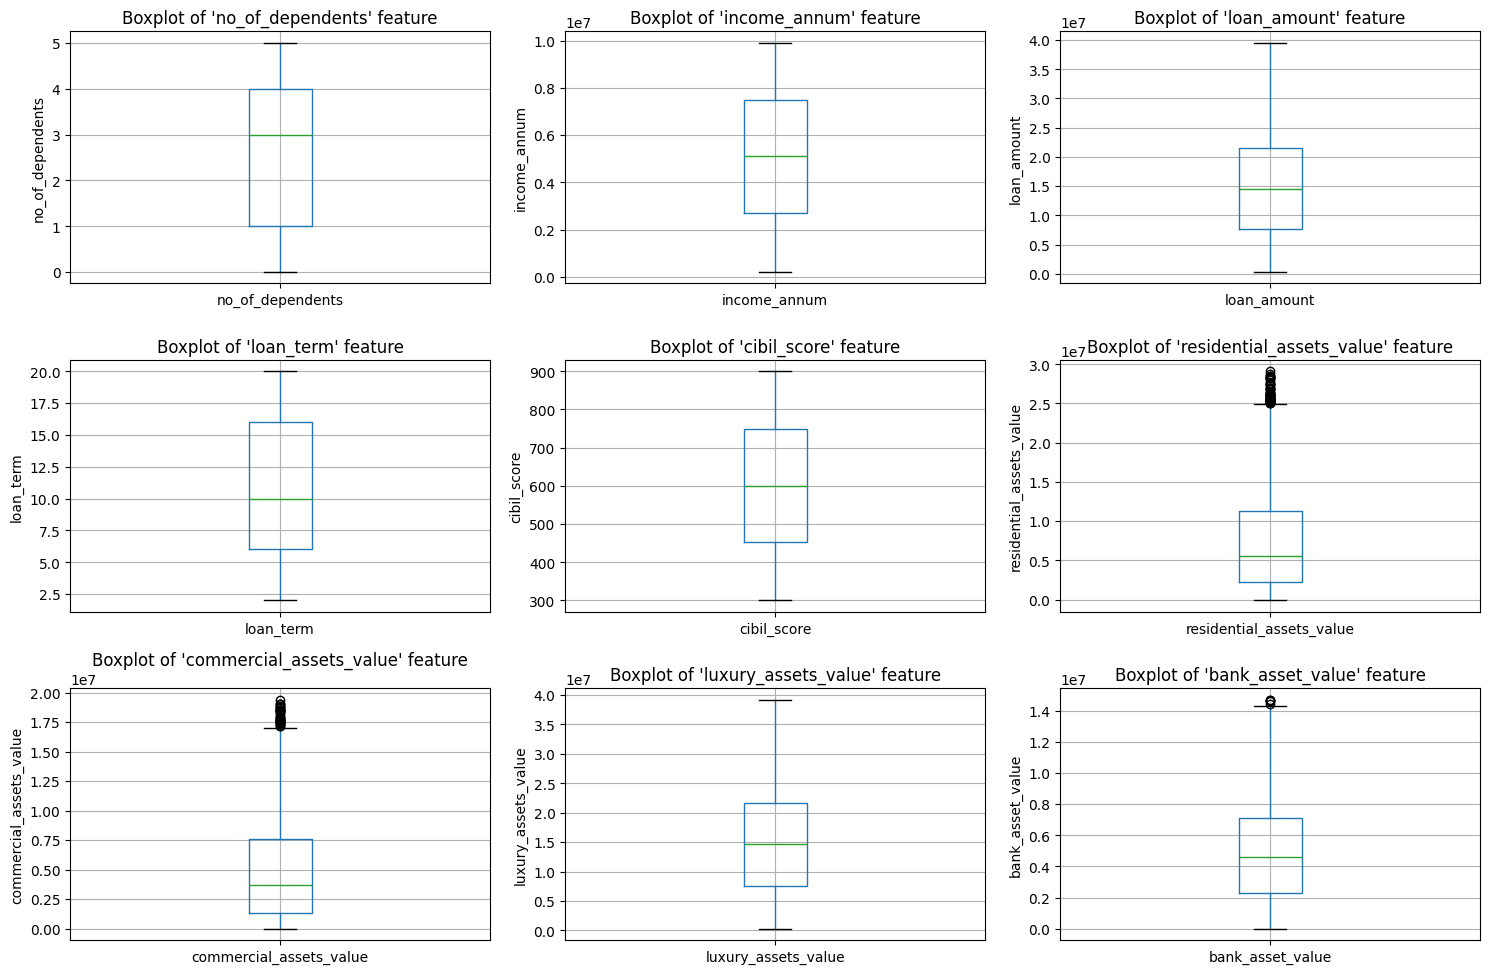

In [78]:
numerical_columns = df.select_dtypes(include=['int']).columns.to_list()

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    df.boxplot(column=col, ax=axes[i])
    axes[i].set_title(f"Boxplot of '{col}' feature")
    axes[i].set_ylabel(col)


plt.tight_layout()
plt.show()


In [79]:
def remove_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_filtered = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
    return df_filtered

df = remove_outliers(df, 'residential_assets_value')
df = remove_outliers(df, 'commercial_assets_value')
df = remove_outliers(df, 'bank_asset_value')

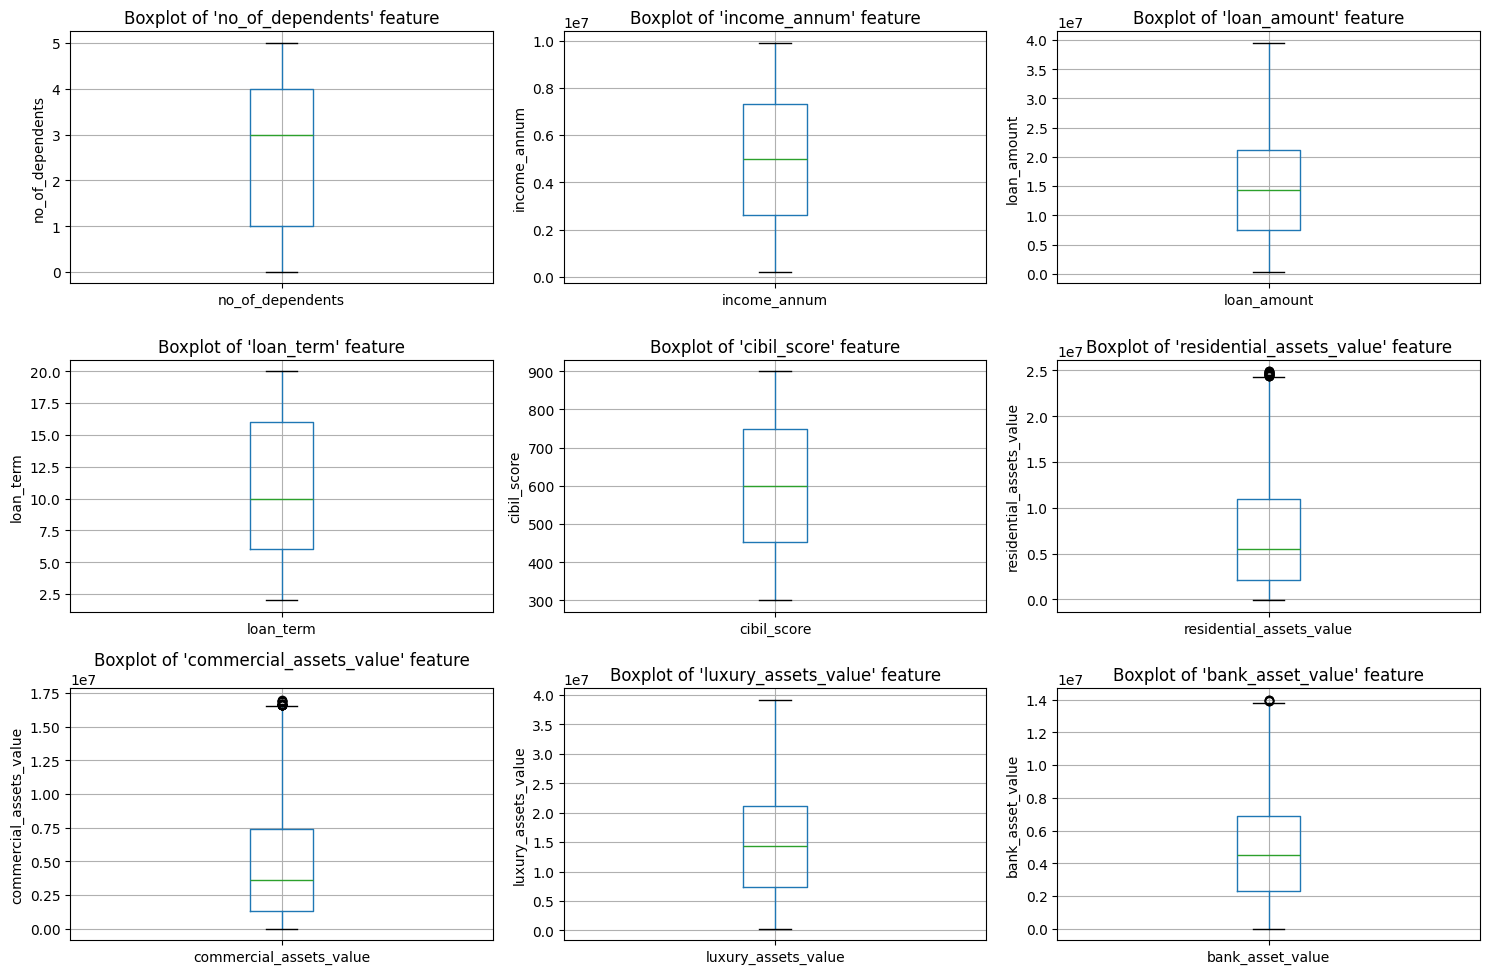

In [80]:
numerical_columns = df.select_dtypes(include=['int']).columns.to_list()

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    df.boxplot(column=col, ax=axes[i])
    axes[i].set_title(f"Boxplot of '{col}' feature")
    axes[i].set_ylabel(col)


plt.tight_layout()
plt.show()


Histrogram to show normal distribution

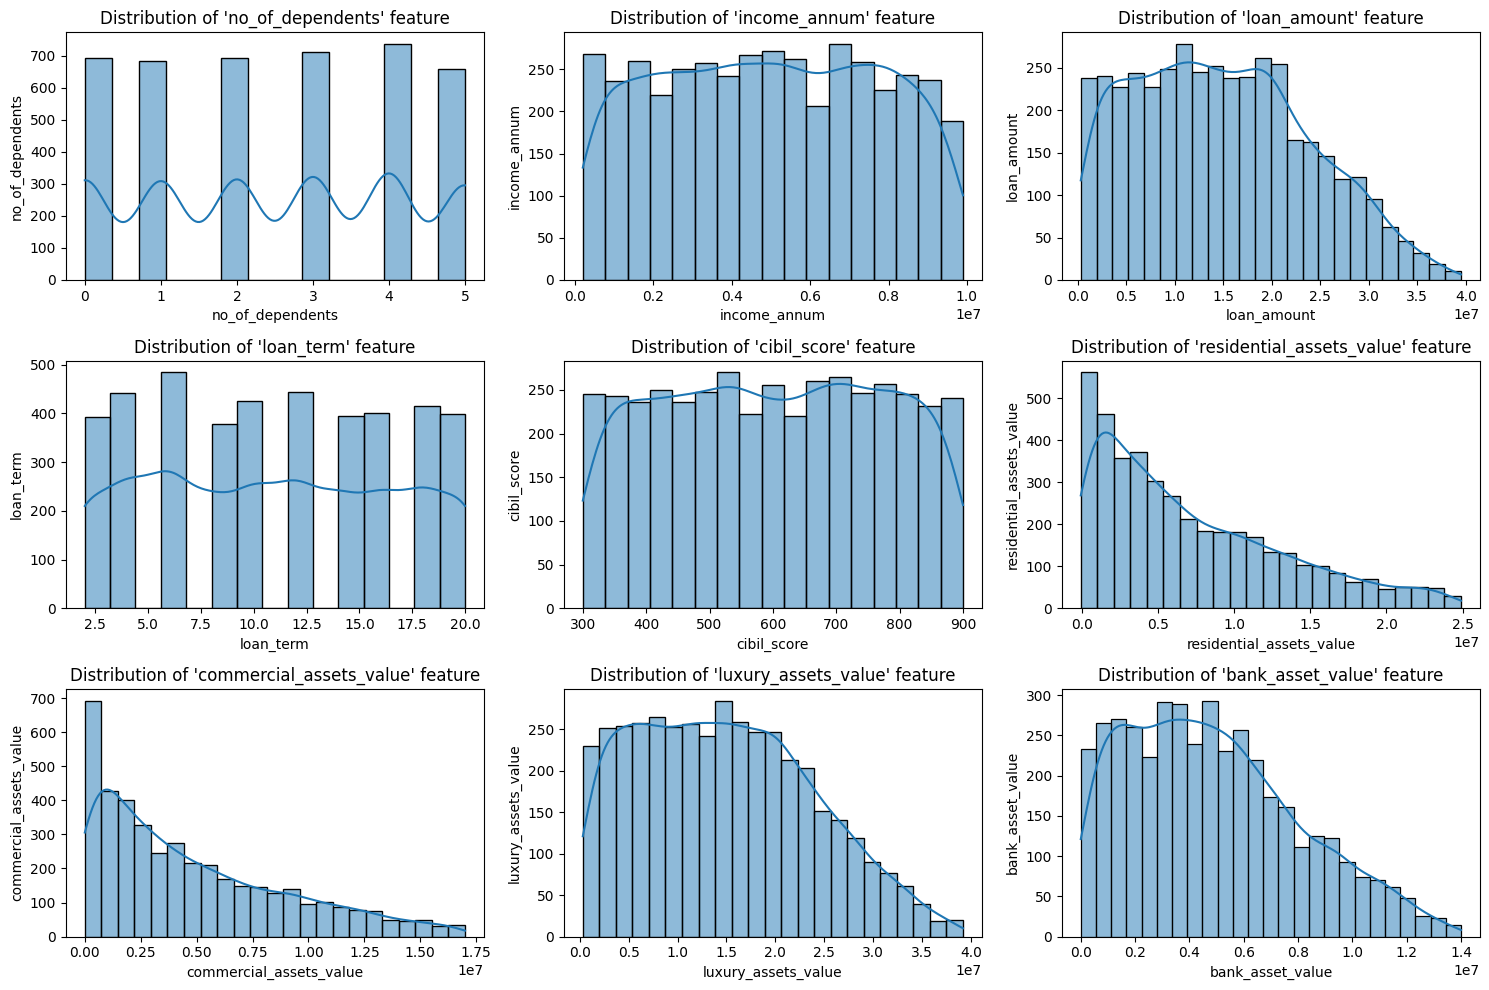

In [81]:
numerical_columns = df.select_dtypes(include=['int']).columns.to_list()

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    sns.histplot(data=df, x=col, kde=True,ax=axes[i])
    axes[i].set_title(f"Distribution of '{col}' feature")
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()


Plot for Education Distribution

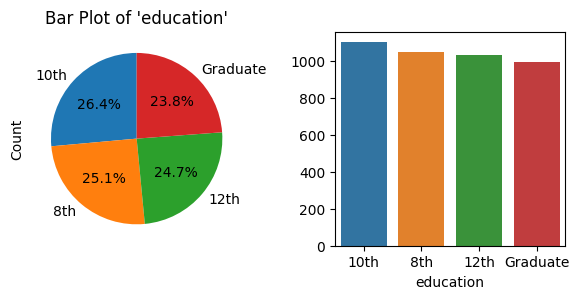

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

columns = ['education']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))
axes = axes.flatten()

for i, col in enumerate(columns):
    data = df[col].value_counts()  

    axes[i].pie(data, labels=data.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f"Pie Chart of '{col}'")
    
    sns.barplot(x=data.index, y=data.values,hue=data.index)
    axes[i].set_title(f"Bar Plot of '{col}'")
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()


Plot for Self-Employeed Distribution

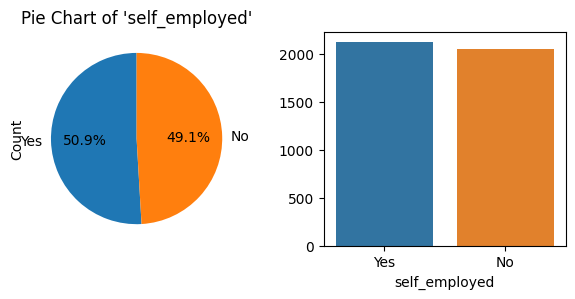

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

columns = ['self_employed']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))

axes = axes.flatten()

for i, col in enumerate(columns):
    data = df[col].value_counts() 
    
    sns.barplot(x=data.index, y=data.values,hue=data.index)
    axes[i].set_title(f"Bar Plot of '{col}'")
    axes[i].set_ylabel('Count')

    axes[i].pie(data, labels=data.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f"Pie Chart of '{col}'")
    
    

plt.tight_layout()
plt.show()


Plot for Employment Status Dsitribution

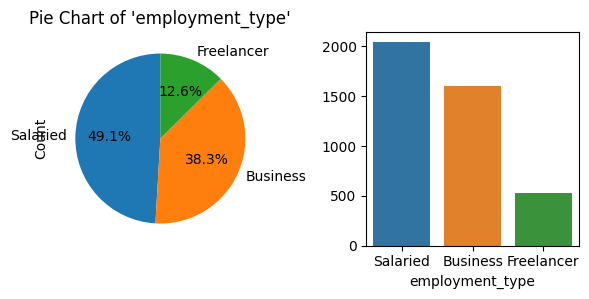

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

columns = ['employment_type']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))

axes = axes.flatten()

for i, col in enumerate(columns):
    data = df[col].value_counts() 
    
    sns.barplot(x=data.index, y=data.values,hue=data.index)
    axes[i].set_title(f"Bar Plot of '{col}'")
    axes[i].set_ylabel('Count')

    axes[i].pie(data, labels=data.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f"Pie Chart of '{col}'")    

plt.tight_layout()
plt.show()


Plot for Loan Status Dsitribution

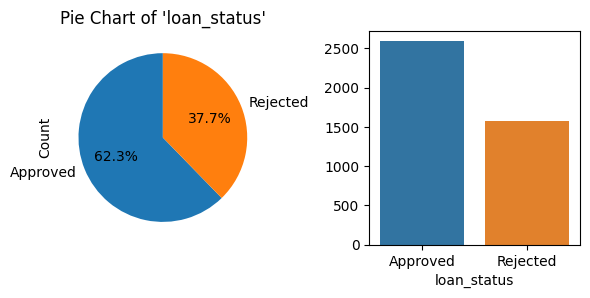

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

columns = ['loan_status']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))

axes = axes.flatten()

for i, col in enumerate(columns):
    data = df[col].value_counts() 
    
    sns.barplot(x=data.index, y=data.values,hue=data.index)
    axes[i].set_title(f"Bar Plot of '{col}'")
    axes[i].set_ylabel('Count')

    axes[i].pie(data, labels=data.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f"Pie Chart of '{col}'")    

plt.tight_layout()
plt.show()


Heatmap showing Correlation Matrix of numerical features

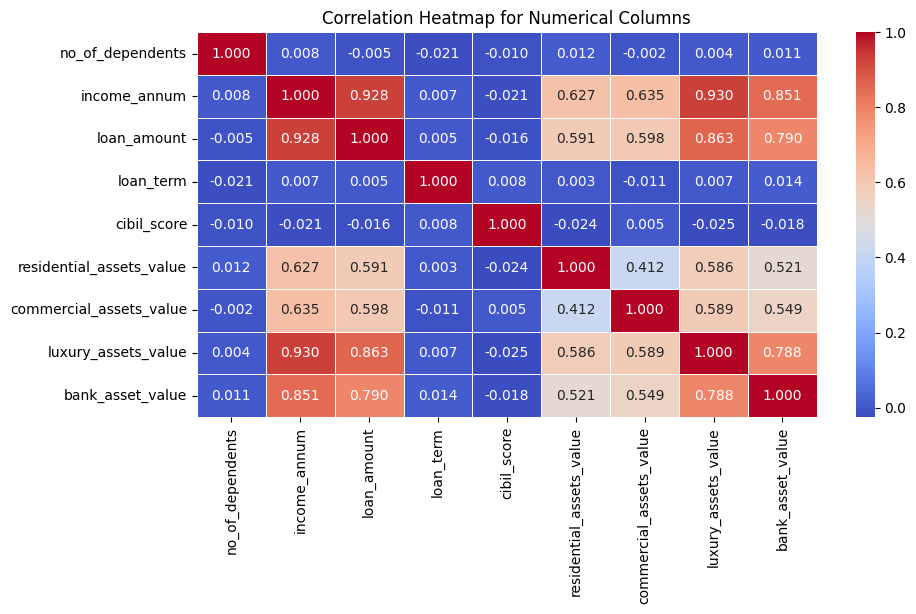

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_columns = df.select_dtypes(include=['int64'])

correlation_matrix = numerical_columns.corr()

plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.3f', linewidths=0.5)
plt.title('Correlation Heatmap for Numerical Columns')
plt.show()


Scatterplot between numerical featuees and loan amount

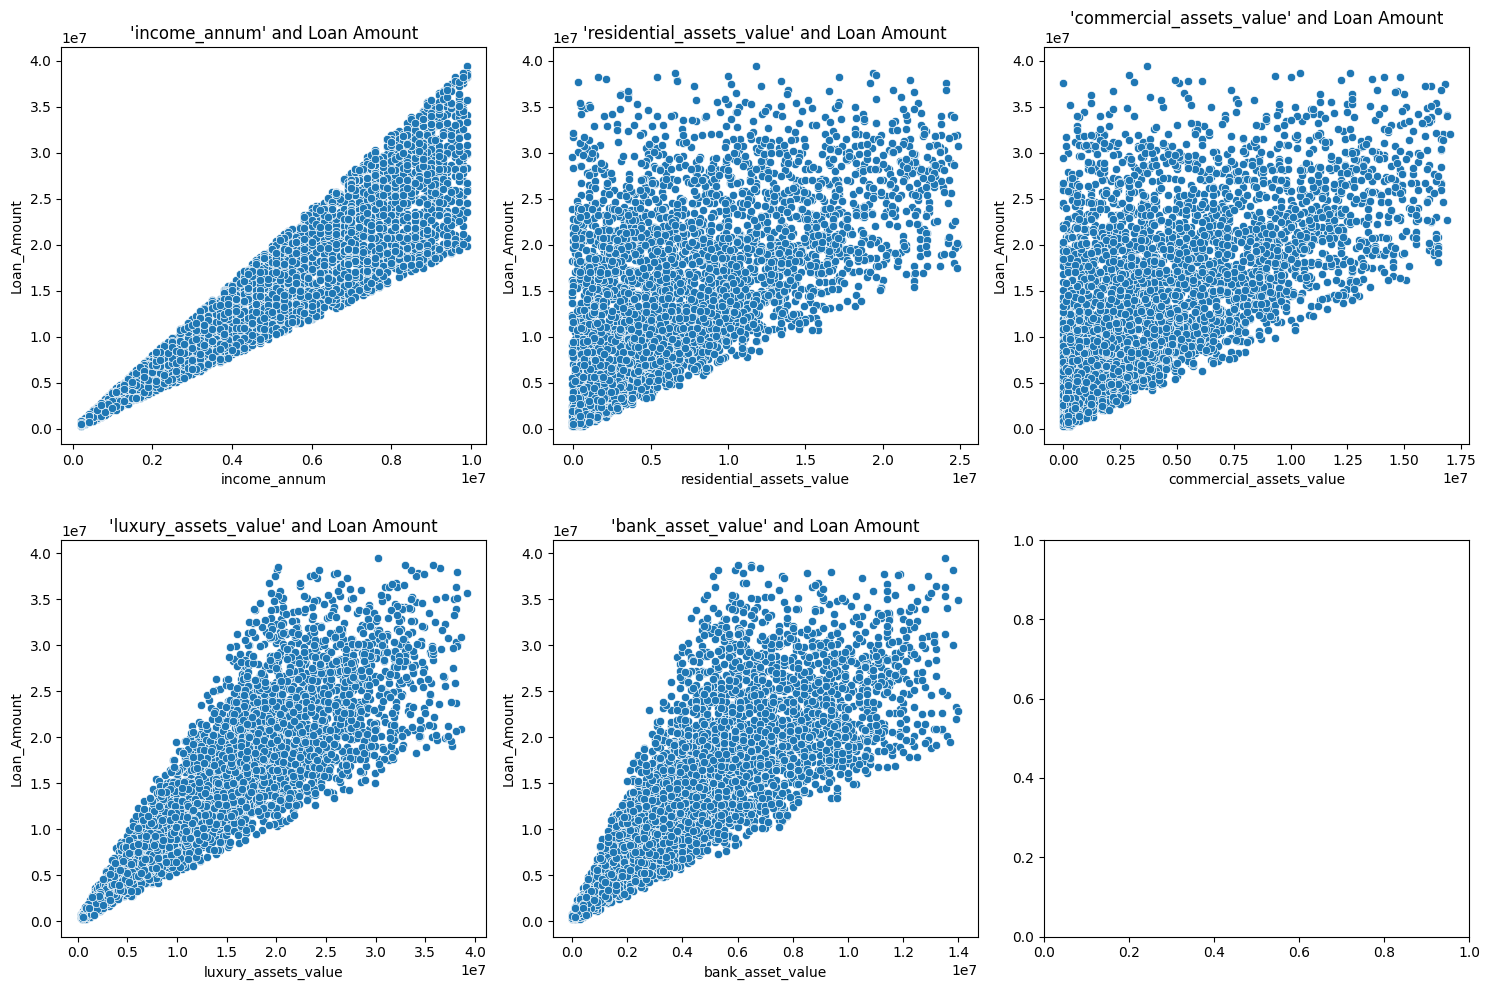

In [87]:
columns = ['income_annum','residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))


axes = axes.flatten()

for i, col in enumerate(columns):
    sns.scatterplot(x=col, y="loan_amount", data=df,ax=axes[i])
    axes[i].set_title(f"'{col}' and Loan Amount")
    axes[i].set_ylabel('Loan_Amount')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

Grouped Bar Chart for Loan Status by Education and Self-Employment

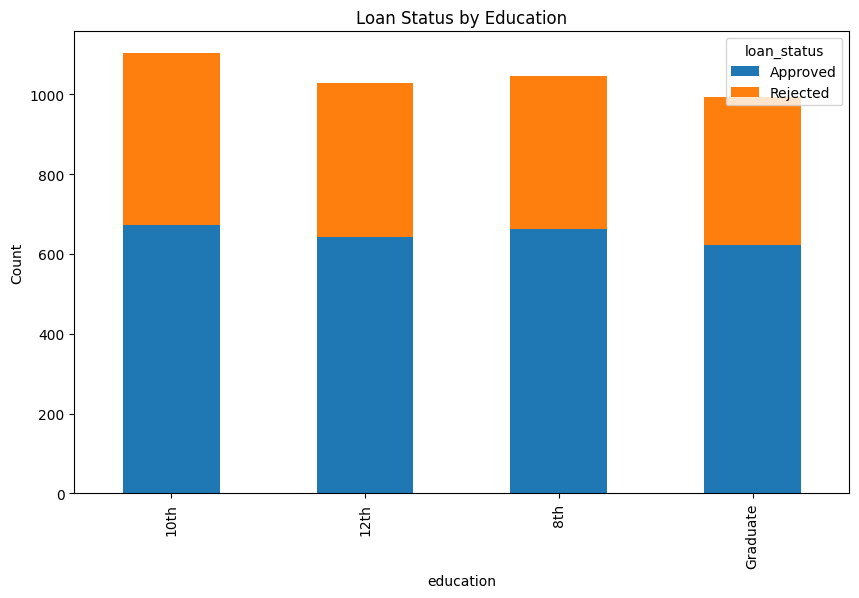

In [88]:
loan_status_dependents = df.groupby(['education', 'loan_status']).size().unstack()
loan_status_dependents.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Loan Status by Education')
plt.ylabel('Count')
plt.show()

Grouped Bar Chart for Loan Status by Self-Employment

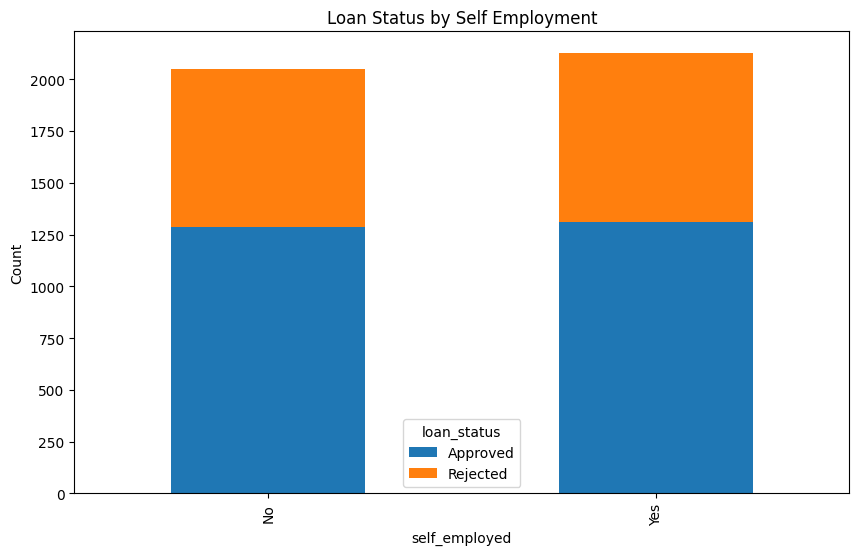

In [89]:
loan_status_dependents = df.groupby(['self_employed', 'loan_status']).size().unstack()
loan_status_dependents.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Loan Status by Self Employment')
plt.ylabel('Count')
plt.show()

Grouped Bar Chart for Loan Status by Education

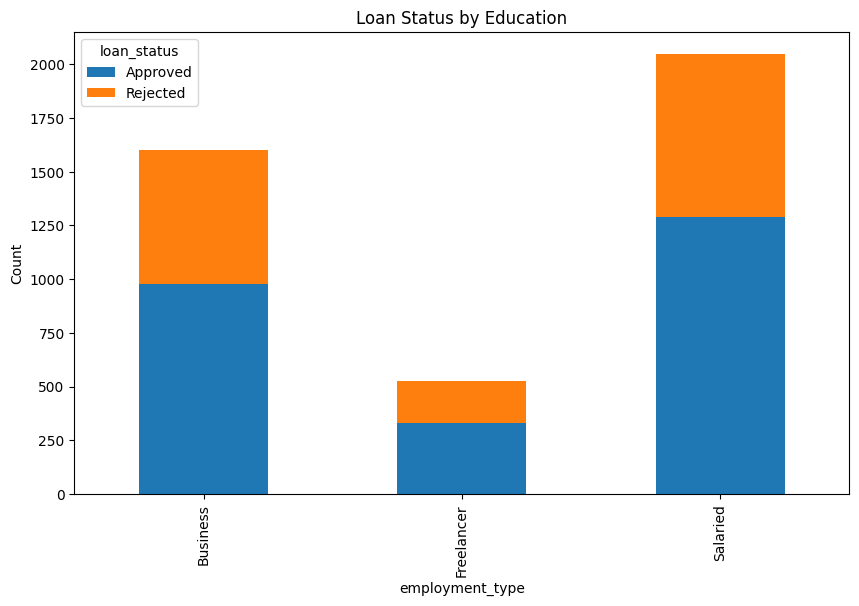

In [90]:
loan_status_dependents = df.groupby(['employment_type', 'loan_status']).size().unstack()
loan_status_dependents.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Loan Status by Education')
plt.ylabel('Count')
plt.show()

Loan Status by Number of Dependents

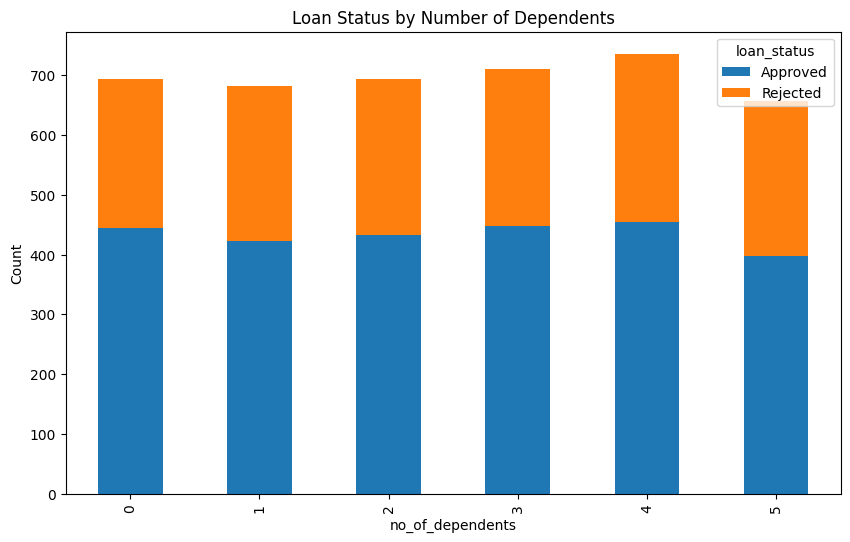

In [91]:
loan_status_dependents = df.groupby(['no_of_dependents', 'loan_status']).size().unstack()
loan_status_dependents.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Loan Status by Number of Dependents')
plt.ylabel('Count')
plt.show()

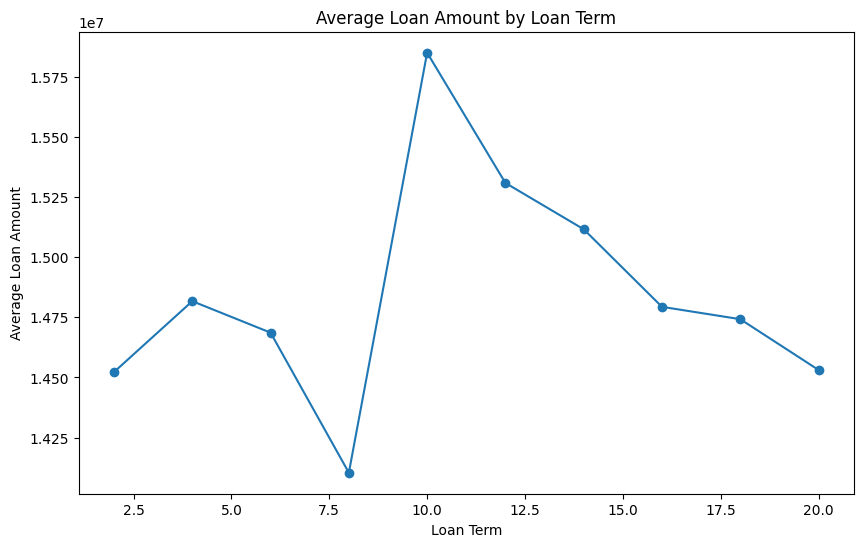

In [92]:
avg_loan_amount_term = df.groupby('loan_term')['loan_amount'].mean()

plt.figure(figsize=(10, 6))
plt.plot(avg_loan_amount_term.index, avg_loan_amount_term.values, marker='o')
plt.title('Average Loan Amount by Loan Term')
plt.xlabel('Loan Term')
plt.ylabel('Average Loan Amount')
plt.show()


Average Loan Amount by No. of Dependents and Loan Status

loan_status           Approved      Rejected
no_of_dependents                            
0                 1.483730e+07  1.450726e+07
1                 1.525485e+07  1.440425e+07
2                 1.531088e+07  1.431221e+07
3                 1.563535e+07  1.488447e+07
4                 1.404207e+07  1.527660e+07
5                 1.482839e+07  1.448880e+07


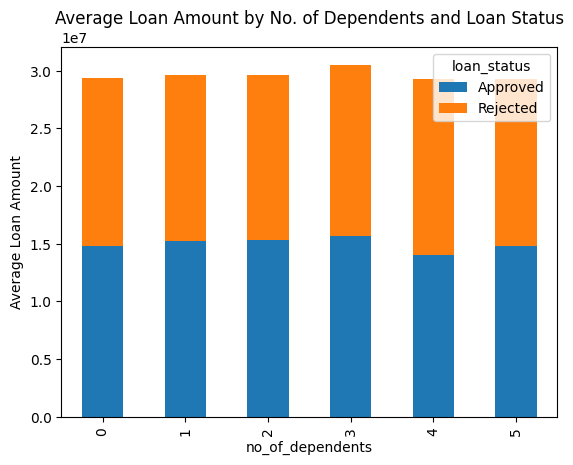

In [93]:
loan_pivot_dependents = df.pivot_table(values='loan_amount', index='no_of_dependents', columns='loan_status', aggfunc='mean')
print(loan_pivot_dependents)
loan_pivot_dependents.plot(kind='bar', stacked=True)
plt.title('Average Loan Amount by No. of Dependents and Loan Status')
plt.ylabel('Average Loan Amount')
plt.show()

Average Loan Amount by Education Level and Loan Status

loan_status      Approved      Rejected
education                              
10th         1.496265e+07  1.492691e+07
12th         1.532757e+07  1.426150e+07
8th          1.458263e+07  1.488909e+07
Graduate     1.506677e+07  1.451051e+07


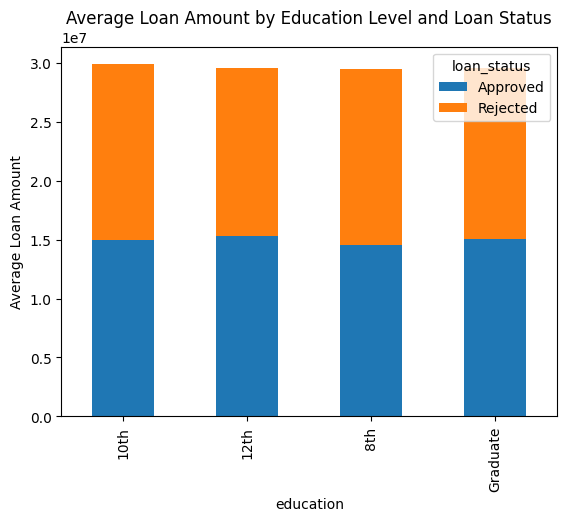

In [94]:
loan_education_pivot = df.pivot_table(values='loan_amount', index='education', columns='loan_status', aggfunc='mean')
print(loan_education_pivot)
loan_education_pivot.plot(kind='bar', stacked=True)
plt.title('Average Loan Amount by Education Level and Loan Status')
plt.ylabel('Average Loan Amount')
plt.show()

loan_status          Approved      Rejected
employment_type                            
Business         1.518354e+07  1.439566e+07
Freelancer       1.517410e+07  1.387254e+07
Salaried         1.477750e+07  1.506838e+07


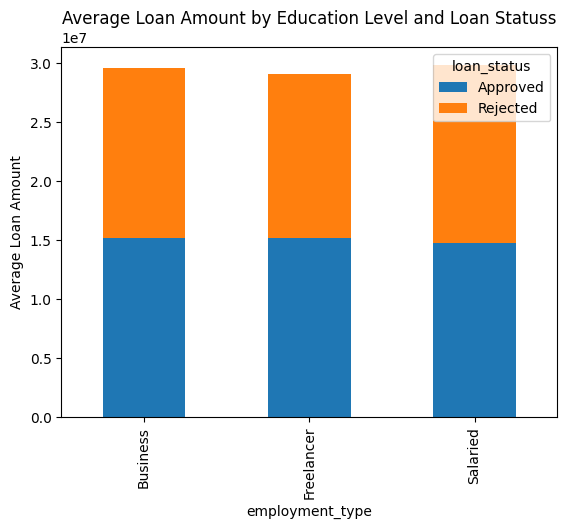

In [95]:
loan_education_pivot = df.pivot_table(values='loan_amount', index='employment_type', columns='loan_status', aggfunc='mean')
print(loan_education_pivot)
loan_education_pivot.plot(kind='bar', stacked=True)
plt.title('Average Loan Amount by Education Level and Loan Statuss')
plt.ylabel('Average Loan Amount')
plt.show()

Average Loan Amount by Self_Employed and Loan Status

loan_status        Approved      Rejected
self_employed                            
No             1.477750e+07  1.506838e+07
Yes            1.518115e+07  1.427178e+07


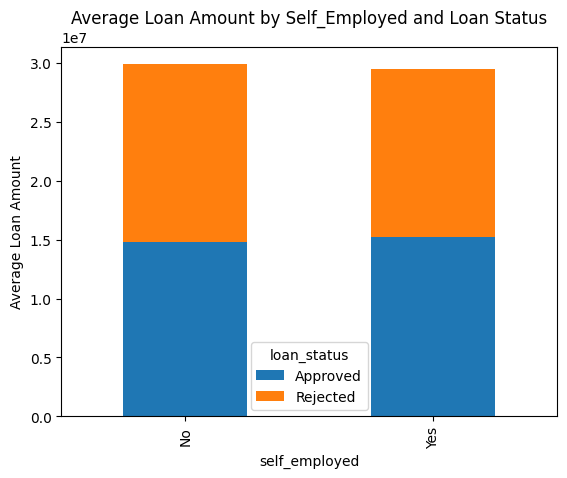

In [96]:
loan_education_pivot = df.pivot_table(values='loan_amount', index='self_employed', columns='loan_status', aggfunc='mean')
print(loan_education_pivot)
loan_education_pivot.plot(kind='bar', stacked=True)
plt.title('Average Loan Amount by Self_Employed and Loan Status')
plt.ylabel('Average Loan Amount')
plt.show()

Plot for income ammount vs loan ammount for loan status w.r.t different education levels 

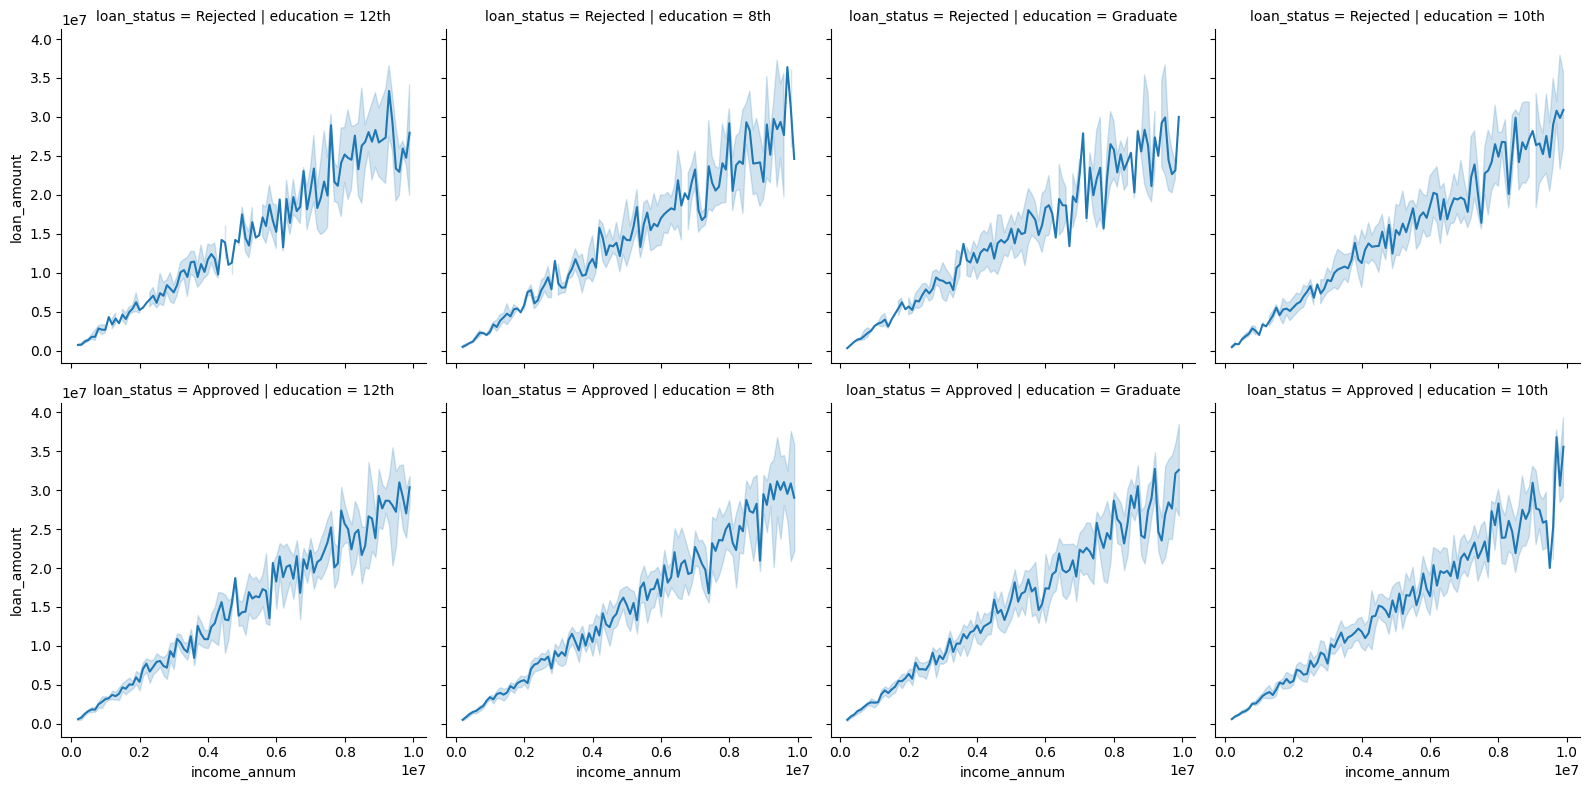

In [97]:
g = sns.FacetGrid(df, col='education', row="loan_status", height=4)

g.map(sns.lineplot, 'income_annum', 'loan_amount')

plt.show()

Plot for income ammount vs loan ammount for loan status w.r.t employment type

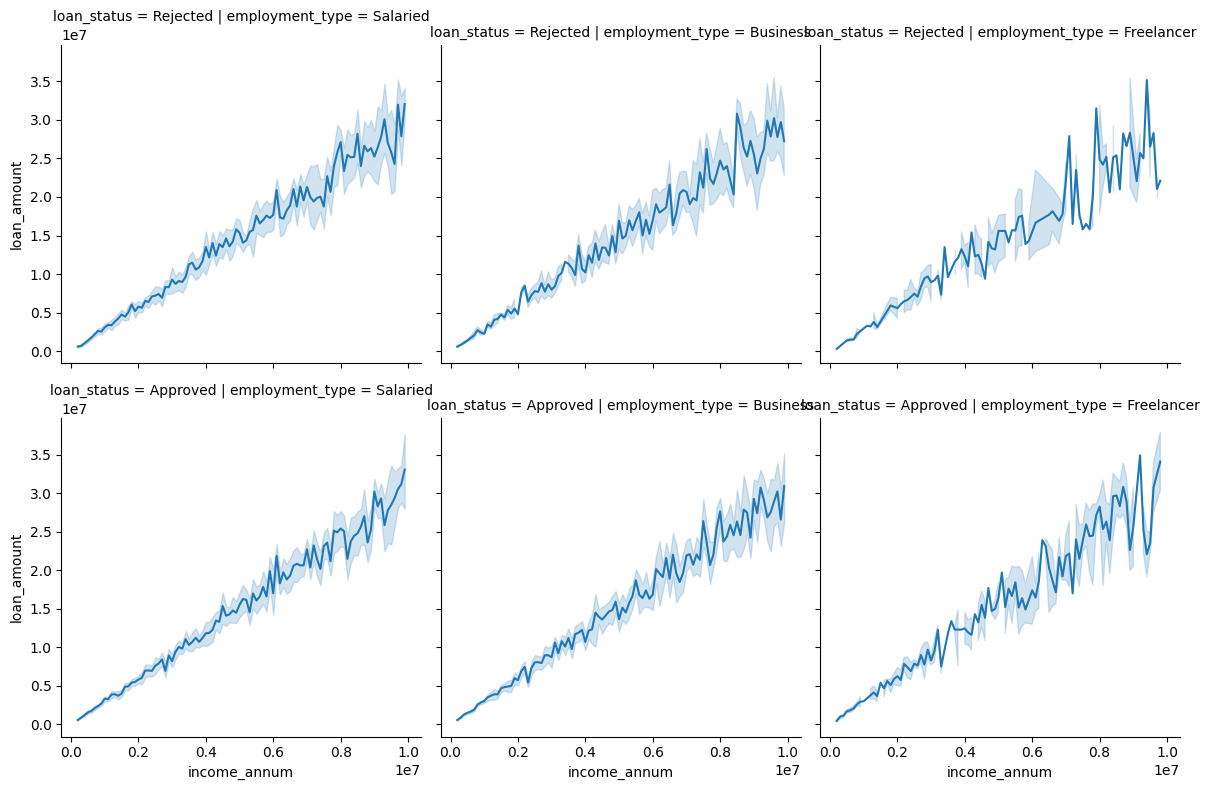

In [98]:
g = sns.FacetGrid(df, col='employment_type', row="loan_status", height=4)

g.map(sns.lineplot, 'income_annum', 'loan_amount')

plt.show()

Plot for loan term vs loan amount for loan status w.r.t employment type 

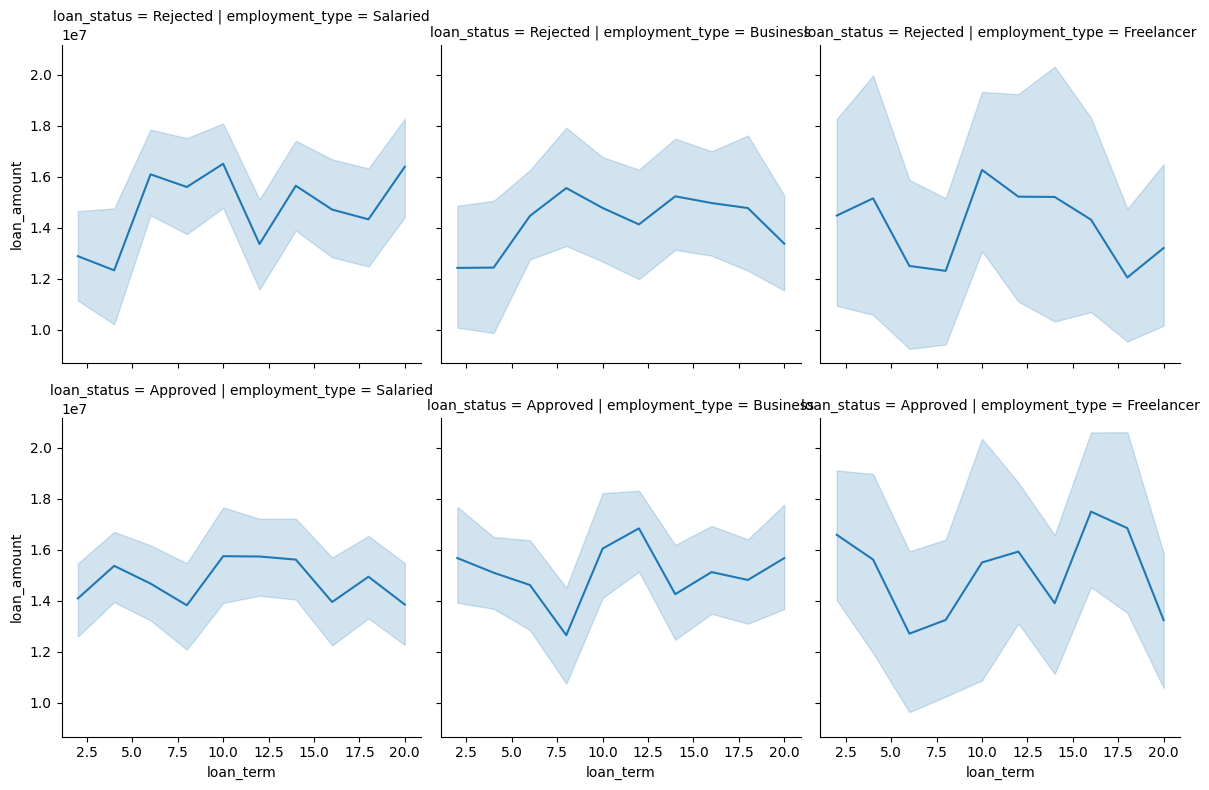

In [99]:
g = sns.FacetGrid(df, col='employment_type', row="loan_status", height=4)

g.map(sns.lineplot, 'loan_term', 'loan_amount')


plt.show()

Plot for loan term vs loan amount for loan status w.r.t education

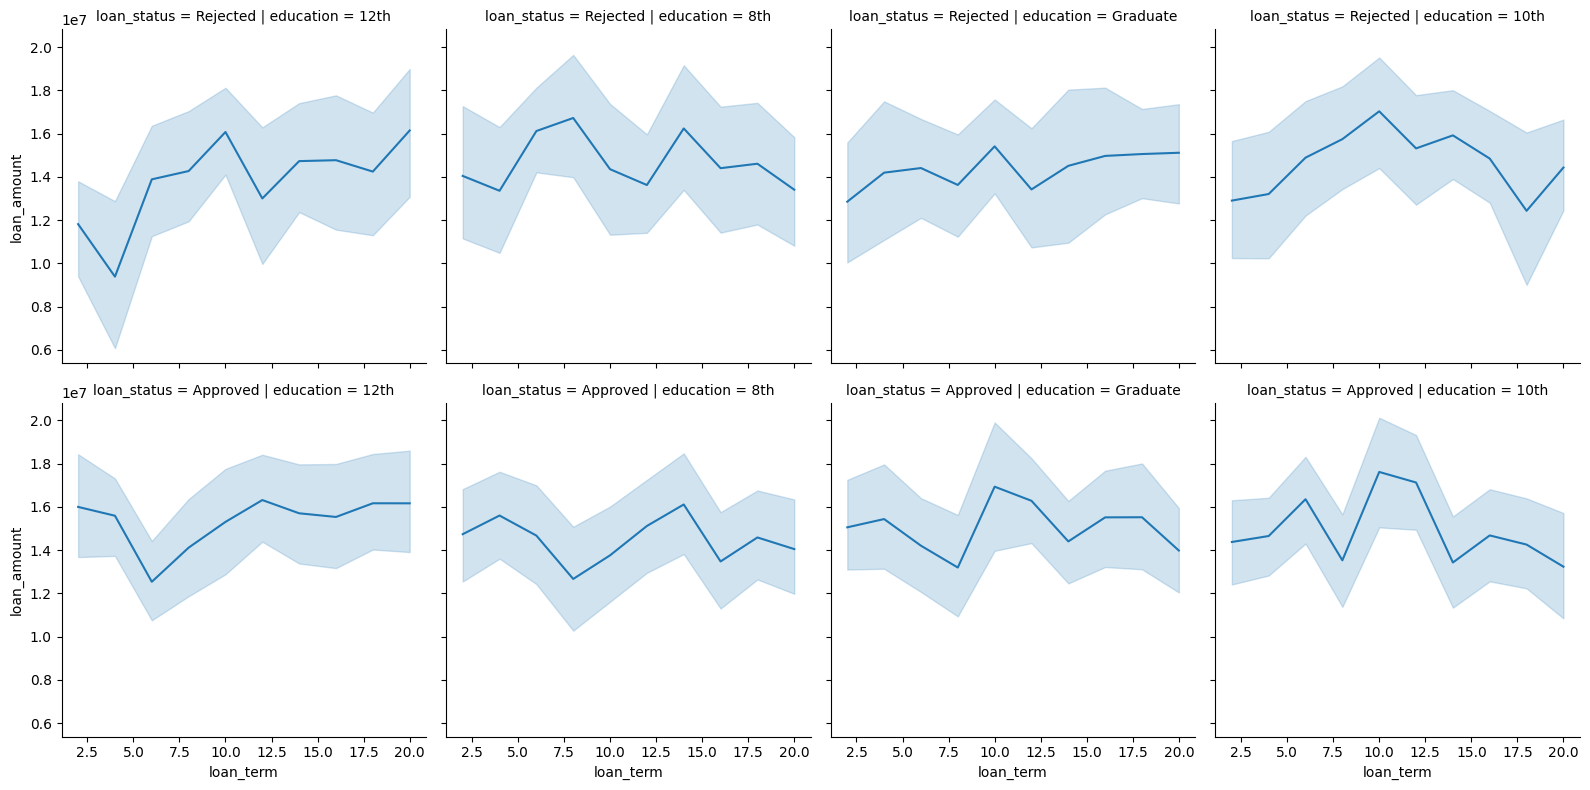

In [100]:
g = sns.FacetGrid(df, col='education', row="loan_status", height=4)

g.map(sns.lineplot, 'loan_term', 'loan_amount')


plt.show()

Hypothesis Testing

Chi-Square Test Between Loan Status and Employment Type

Chi-square Statistic: 1.4928622401013552
P-value: 0.47405538408544423
Fail to reject the null hypothesis: loan_status and employment_type are independent.


<Figure size 800x400 with 0 Axes>

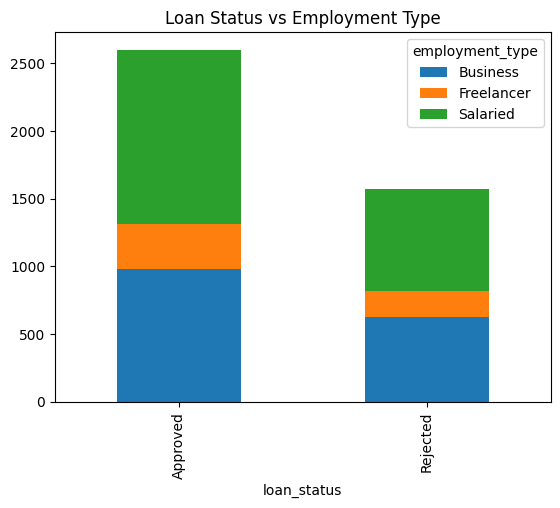

In [101]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['loan_status'], df['employment_type'])

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: loan_status and employment_type are dependent.")
else:
    print("Fail to reject the null hypothesis: loan_status and employment_type are independent.")


plt.figure(figsize=(8, 4))
contingency_table.plot(kind='bar', stacked=True)
plt.title('Loan Status vs Employment Type')
plt.show()

Chi-Square Test Between Loan Status and Self Employe Status

Chi-square Statistic: 0.6875143151837344
P-value: 0.407011143243904
Fail to reject the null hypothesis: loan_status and self_employed are independent.


<Figure size 800x400 with 0 Axes>

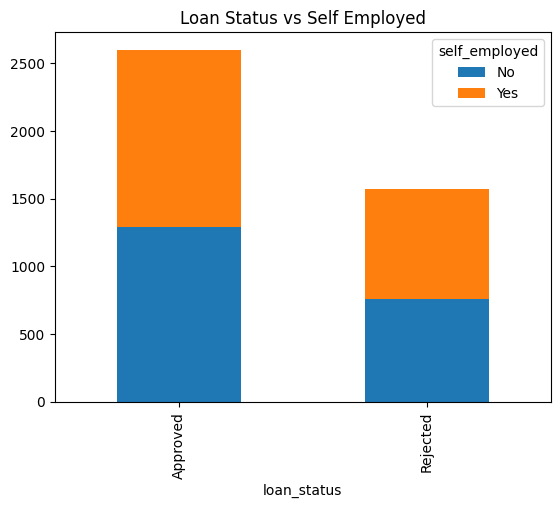

In [102]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['loan_status'], df['self_employed'])

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: loan_status and self_employed are dependent.")
else:
    print("Fail to reject the null hypothesis: loan_status and self_employed are independent.")


plt.figure(figsize=(8, 4))
contingency_table.plot(kind='bar', stacked=True)
plt.title('Loan Status vs Self Employed')
plt.show()


Chi-Square Test Between Loan Status and Education Type

Chi-square Statistic: 1.3348881681817248
P-value: 0.7208656761826335
Fail to reject the null hypothesis: loan_status and education are independent.


<Figure size 800x400 with 0 Axes>

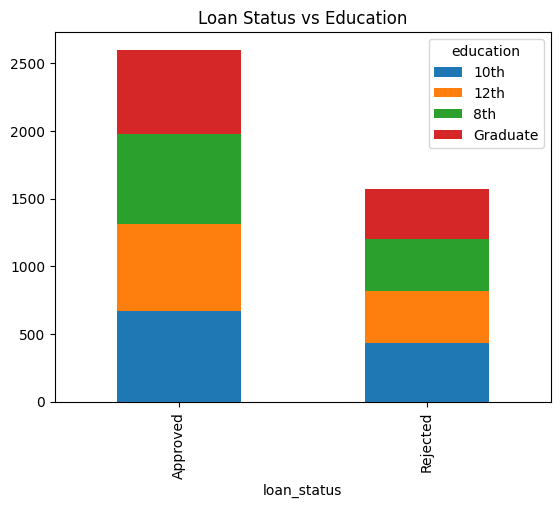

In [103]:
from scipy.stats import chi2_contingency


contingency_table = pd.crosstab(df['loan_status'], df['education'])

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")


alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: loan_status and education are dependent.")
else:
    print("Fail to reject the null hypothesis: loan_status and education are independent.")


plt.figure(figsize=(8, 4))
contingency_table.plot(kind='bar', stacked=True)
plt.title('Loan Status vs Education')
plt.show()

Chi-Square Test Between Loan Status and No. of Dependents

Chi-square Statistic: 2.148167745486308
P-value: 0.8282866055064211
Fail to reject the null hypothesis: Dependents and loan status are independent.


<Figure size 800x400 with 0 Axes>

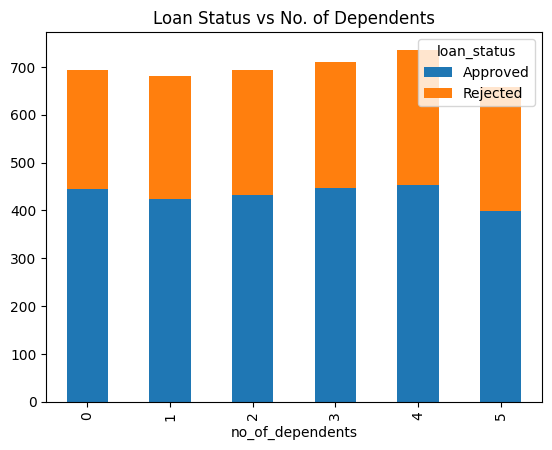

In [104]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['no_of_dependents'], df['loan_status'])


chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Dependents and loan status are related.")
else:
    print("Fail to reject the null hypothesis: Dependents and loan status are independent.")


plt.figure(figsize=(8, 4))
contingency_table.plot(kind='bar', stacked=True)
plt.title('Loan Status vs No. of Dependents')
plt.show()

Shapiro-Wilk test for normality check between loan ammount and loan status

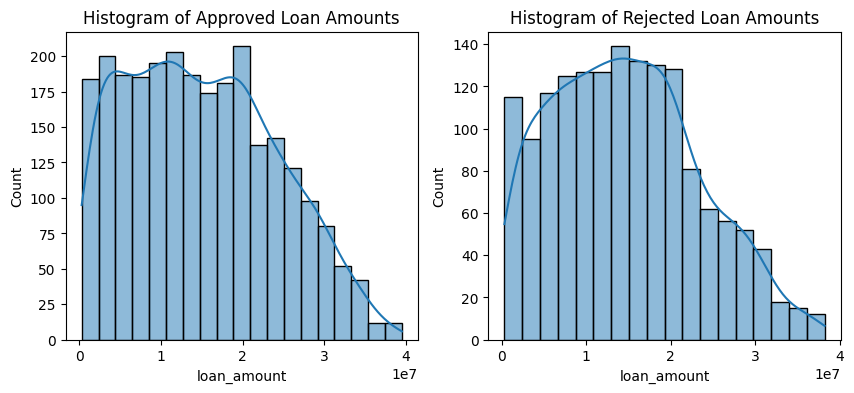

Shapiro-Wilk test for Approved Loans: Statistic=0.9689307663323214, P-value=2.7495215230385246e-23
Shapiro-Wilk test for Rejected Loans: Statistic=0.9753707541048191, P-value=8.76060888941971e-16
Approved loans are not normally distributed (reject H0)
Rejected loans are not normally distributed (reject H0)


In [106]:
from scipy.stats import shapiro


approved_loans = df[df['loan_status'] == 'Approved']['loan_amount']
rejected_loans = df[df['loan_status'] == 'Rejected']['loan_amount']

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.histplot(approved_loans, kde=True)
plt.title('Histogram of Approved Loan Amounts')

plt.subplot(1, 2, 2)
sns.histplot(rejected_loans, kde=True)
plt.title('Histogram of Rejected Loan Amounts')
plt.show()


stat_approved, p_approved = shapiro(approved_loans)
print(f"Shapiro-Wilk test for Approved Loans: Statistic={stat_approved}, P-value={p_approved}")

stat_rejected, p_rejected = shapiro(rejected_loans)
print(f"Shapiro-Wilk test for Rejected Loans: Statistic={stat_rejected}, P-value={p_rejected}")

alpha = 0.05
if p_approved > alpha:
    print("Approved loans are normally distributed (fail to reject H0)")
else:
    print("Approved loans are not normally distributed (reject H0)")

if p_rejected > alpha:
    print("Rejected loans are normally distributed (fail to reject H0)")
else:
    print("Rejected loans are not normally distributed (reject H0)")

Mannwhitneyu Test for loan ammount vs loan status

In [107]:
from scipy.stats import mannwhitneyu

u_stat, p_value = mannwhitneyu(approved_loans, rejected_loans)

print(f"U-statistic: {u_stat}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Significant difference between groups.")
else:
    print("Fail to reject the null hypothesis: No significant difference between groups.")


U-statistic: 2078403.0
P-value: 0.38181572702969047
Fail to reject the null hypothesis: No significant difference between groups.


Shapiro-Wilk test for normality check between residential_assets_value and loan status

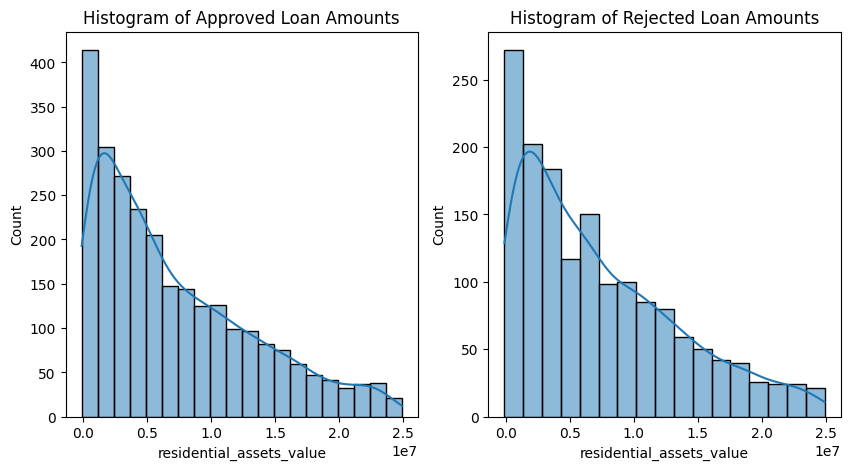

Approved: Stat=0.9008461692149539, P-value=4.1975130700330564e-38
Rejected: Stat=0.9093104290377749, P-value=1.2389275335363067e-29
Approved group is not normally distributed (reject H0)
Rejected group is not normally distributed (reject H0)


In [108]:
from scipy.stats import shapiro

approved_assets = df[df['loan_status'] == 'Approved']['residential_assets_value']
rejected_assets = df[df['loan_status'] == 'Rejected']['residential_assets_value']

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.histplot(approved_assets, kde=True)
plt.title('Histogram of Approved Loan Amounts')
1
plt.subplot(1, 2, 2)
sns.histplot(rejected_assets, kde=True)
plt.title('Histogram of Rejected Loan Amounts')
plt.show()

stat_approved, p_approved = shapiro(approved_assets)
stat_rejected, p_rejected = shapiro(rejected_assets)

print(f'Approved: Stat={stat_approved}, P-value={p_approved}')
print(f'Rejected: Stat={stat_rejected}, P-value={p_rejected}')


alpha = 0.05
if p_approved > alpha:
    print('Approved group is normally distributed (fail to reject H0)')
else:
    print('Approved group is not normally distributed (reject H0)')

if p_rejected > alpha:
    print('Rejected group is normally distributed (fail to reject H0)')
else:
    print('Rejected group is not normally distributed (reject H0)')


Mannwhitneyu Test for residential_assets_value vs loan status

In [109]:
from scipy.stats import mannwhitneyu

u_stat, p_value = mannwhitneyu(approved_assets, rejected_assets)

print(f"U-statistic: {u_stat}")
print(f"P-value: {p_value}")


alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Significant difference between groups.")
else:
    print("Fail to reject the null hypothesis: No significant difference between groups.")


U-statistic: 2002900.5
P-value: 0.25973236748784656
Fail to reject the null hypothesis: No significant difference between groups.


Shapiro-Wilk test for normality check between bank_assets_value and loan status

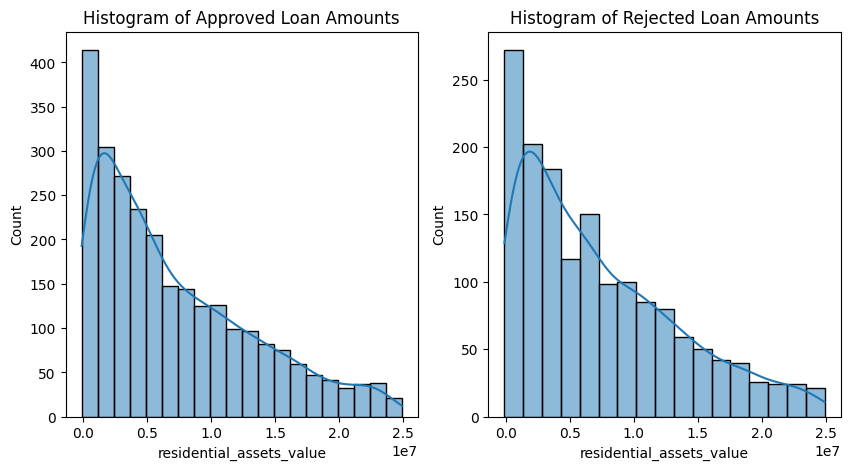

Approved: Stat=0.9585735097156927, P-value=1.3263812327492244e-26
Rejected: Stat=0.9617309284630201, P-value=6.015942969417553e-20
Approved group is not normally distributed (reject H0)
Rejected group is not normally distributed (reject H0)


In [110]:
from scipy.stats import shapiro


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.histplot(approved_assets, kde=True)
plt.title('Histogram of Approved Loan Amounts')
1
plt.subplot(1, 2, 2)
sns.histplot(rejected_assets, kde=True)
plt.title('Histogram of Rejected Loan Amounts')
plt.show()


approved_assets = df[df['loan_status'] == 'Approved']['bank_asset_value']
rejected_assets = df[df['loan_status'] == 'Rejected']['bank_asset_value']


stat_approved, p_approved = shapiro(approved_assets)
stat_rejected, p_rejected = shapiro(rejected_assets)

print(f'Approved: Stat={stat_approved}, P-value={p_approved}')
print(f'Rejected: Stat={stat_rejected}, P-value={p_rejected}')


alpha = 0.05
if p_approved > alpha:
    print('Approved group is normally distributed (fail to reject H0)')
else:
    print('Approved group is not normally distributed (reject H0)')

if p_rejected > alpha:
    print('Rejected group is normally distributed (fail to reject H0)')
else:
    print('Rejected group is not normally distributed (reject H0)')


Mannwhitneyu Test for bank_assets_value vs loan status

In [111]:
from scipy.stats import mannwhitneyu

u_stat, p_value = mannwhitneyu(approved_assets, rejected_assets)

print(f"U-statistic: {u_stat}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Significant difference between groups.")
else:
    print("Fail to reject the null hypothesis: No significant difference between groups.")


U-statistic: 2018926.0
P-value: 0.4825590010346593
Fail to reject the null hypothesis: No significant difference between groups.


Shapiro-Wilk test for normality check between commercial_assets_value and loan status

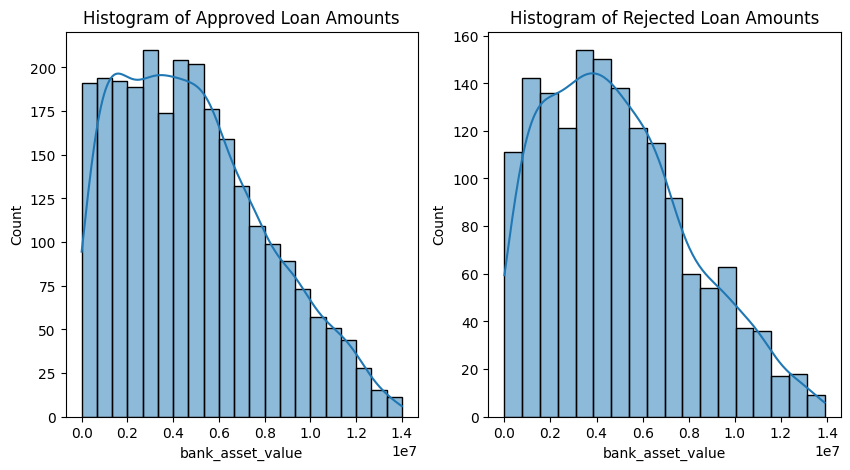

Approved: Stat=0.9000234403062635, P-value=3.1897606447155396e-38
Approved group is not normally distributed (reject H0)
Rejected: Stat=0.899621952090228, P-value=6.600835919129151e-31
Rejected group is not normally distributed (reject H0)


In [112]:
from scipy.stats import shapiro

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.histplot(approved_assets, kde=True)
plt.title('Histogram of Approved Loan Amounts')
1
plt.subplot(1, 2, 2)
sns.histplot(rejected_assets, kde=True)
plt.title('Histogram of Rejected Loan Amounts')
plt.show()


approved_assets = df[df['loan_status'] == 'Approved']['commercial_assets_value']
rejected_assets = df[df['loan_status'] == 'Rejected']['commercial_assets_value']


stat_approved, p_approved = shapiro(approved_assets)
stat_rejected, p_rejected = shapiro(rejected_assets)

print(f'Approved: Stat={stat_approved}, P-value={p_approved}')


alpha = 0.05
if p_approved > alpha:
    print('Approved group is normally distributed (fail to reject H0)')
else:
    print('Approved group is not normally distributed (reject H0)')

print(f'Rejected: Stat={stat_rejected}, P-value={p_rejected}')

if p_rejected > alpha:
    print('Rejected group is normally distributed (fail to reject H0)')
else:
    print('Rejected group is not normally distributed (reject H0)')


Mannwhitneyu Test for comemercial_assets_value vs loan status

In [113]:
from scipy.stats import mannwhitneyu

u_stat, p_value = mannwhitneyu(approved_assets, rejected_assets)

print(f"U-statistic: {u_stat}")
print(f"P-value: {p_value}")


alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Significant difference between groups.")
else:
    print("Fail to reject the null hypothesis: No significant difference between groups.")


U-statistic: 2076992.0
P-value: 0.4024773351283001
Fail to reject the null hypothesis: No significant difference between groups.


Shapiro-Wilk test for normality check between luxury_assets_value and loan status

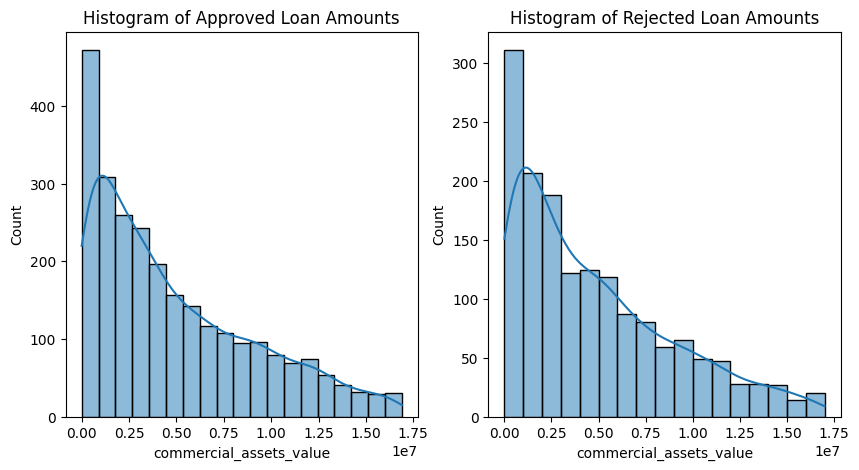

Approved: Stat=0.9685864394739512, P-value=2.0726573401174727e-23
Approved group is not normally distributed (reject H0)
Rejected: Stat=0.9728513629542227, P-value=1.169616759417837e-16
Rejected group is not normally distributed (reject H0)


In [114]:
from scipy.stats import shapiro

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.histplot(approved_assets, kde=True)
plt.title('Histogram of Approved Loan Amounts')
1
plt.subplot(1, 2, 2)
sns.histplot(rejected_assets, kde=True)
plt.title('Histogram of Rejected Loan Amounts')
plt.show()


approved_assets = df[df['loan_status'] == 'Approved']['luxury_assets_value']
rejected_assets = df[df['loan_status'] == 'Rejected']['luxury_assets_value']


stat_approved, p_approved = shapiro(approved_assets)
stat_rejected, p_rejected = shapiro(rejected_assets)

print(f'Approved: Stat={stat_approved}, P-value={p_approved}')

alpha = 0.05
if p_approved > alpha:
    print('Approved group is normally distributed (fail to reject H0)')
else:
    print('Approved group is not normally distributed (reject H0)')

print(f'Rejected: Stat={stat_rejected}, P-value={p_rejected}')

if p_rejected > alpha:
    print('Rejected group is normally distributed (fail to reject H0)')
else:
    print('Rejected group is not normally distributed (reject H0)')


Mannwhitneyu Test for luxury_assets_value vs loan status

In [115]:
from scipy.stats import mannwhitneyu

u_stat, p_value = mannwhitneyu(approved_assets, rejected_assets)

print(f"U-statistic: {u_stat}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Significant difference between groups.")
else:
    print("Fail to reject the null hypothesis: No significant difference between groups.")


U-statistic: 2008859.0
P-value: 0.3325263769677761
Fail to reject the null hypothesis: No significant difference between groups.


Shapiro-Wilk test for normality check between cibil_score and loan status

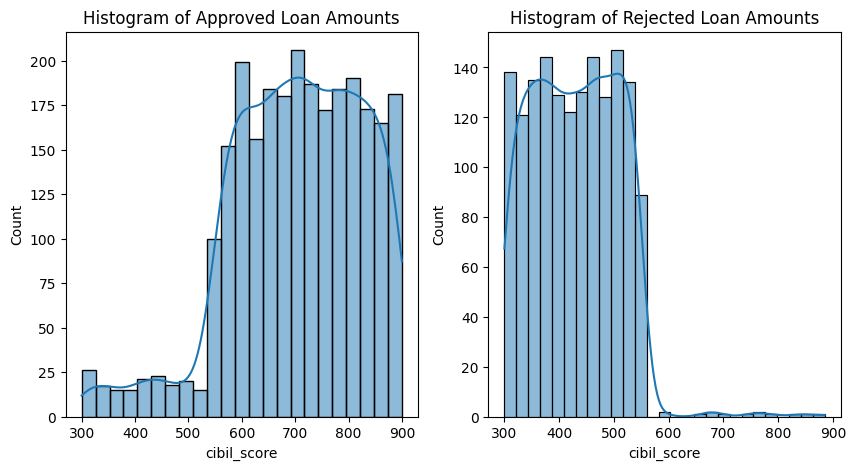

Approved: Stat=0.9586694629567739, P-value=1.413642449842553e-26
Rejected: Stat=0.9463852999188866, P-value=1.7228549718844014e-23
Approved group is not normally distributed (reject H0)
Rejected group is not normally distributed (reject H0)


In [116]:
from scipy.stats import shapiro

approved_assets = df[df['loan_status'] == 'Approved']['cibil_score']
rejected_assets = df[df['loan_status'] == 'Rejected']['cibil_score']

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.histplot(approved_assets, kde=True)
plt.title('Histogram of Approved Loan Amounts')
1
plt.subplot(1, 2, 2)
sns.histplot(rejected_assets, kde=True)
plt.title('Histogram of Rejected Loan Amounts')
plt.show()

stat_approved, p_approved = shapiro(approved_assets)
stat_rejected, p_rejected = shapiro(rejected_assets)

print(f'Approved: Stat={stat_approved}, P-value={p_approved}')
print(f'Rejected: Stat={stat_rejected}, P-value={p_rejected}')


alpha = 0.05
if p_approved > alpha:
    print('Approved group is normally distributed (fail to reject H0)')
else:
    print('Approved group is not normally distributed (reject H0)')

if p_rejected > alpha:
    print('Rejected group is normally distributed (fail to reject H0)')
else:
    print('Rejected group is not normally distributed (reject H0)')


Mannwhitneyu Test for cibil_score vs loan status

In [117]:
from scipy.stats import mannwhitneyu

u_stat, p_value = mannwhitneyu(approved_assets, rejected_assets)

print(f"U-statistic: {u_stat}")
print(f"P-value: {p_value}")


alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Significant difference between groups.")
else:
    print("Fail to reject the null hypothesis: No significant difference between groups.")


U-statistic: 3924229.0
P-value: 0.0
Reject the null hypothesis: Significant difference between groups.


Shapiro-Wilk test for normality check between loan_term and loan status

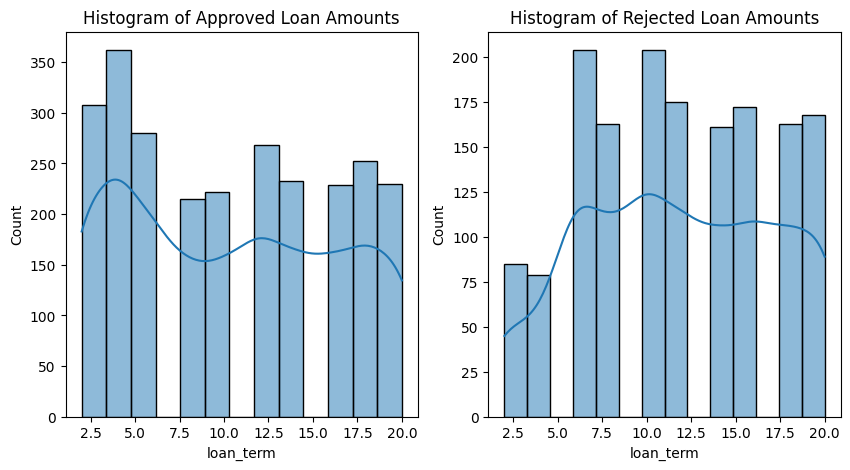

Approved: Stat=0.9236644043410547, P-value=1.978542881549604e-34
Rejected: Stat=0.9482903226440651, P-value=4.2784112595263644e-23
Approved group is not normally distributed (reject H0)
Rejected group is not normally distributed (reject H0)


In [118]:
from scipy.stats import shapiro

approved_assets = df[df['loan_status'] == 'Approved']['loan_term']
rejected_assets = df[df['loan_status'] == 'Rejected']['loan_term']

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.histplot(approved_assets, kde=True)
plt.title('Histogram of Approved Loan Amounts')
1
plt.subplot(1, 2, 2)
sns.histplot(rejected_assets, kde=True)
plt.title('Histogram of Rejected Loan Amounts')
plt.show()

stat_approved, p_approved = shapiro(approved_assets)
stat_rejected, p_rejected = shapiro(rejected_assets)

print(f'Approved: Stat={stat_approved}, P-value={p_approved}')
print(f'Rejected: Stat={stat_rejected}, P-value={p_rejected}')


alpha = 0.05
if p_approved > alpha:
    print('Approved group is normally distributed (fail to reject H0)')
else:
    print('Approved group is not normally distributed (reject H0)')

if p_rejected > alpha:
    print('Rejected group is normally distributed (fail to reject H0)')
else:
    print('Rejected group is not normally distributed (reject H0)')


Mannwhitneyu Test for residential_assets_value vs loan status

In [119]:
from scipy.stats import mannwhitneyu

u_stat, p_value = mannwhitneyu(approved_assets, rejected_assets)

print(f"U-statistic: {u_stat}")
print(f"P-value: {p_value}")


alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Significant difference between groups.")
else:
    print("Fail to reject the null hypothesis: No significant difference between groups.")


U-statistic: 1762451.0
P-value: 4.7108342510863384e-14
Reject the null hypothesis: Significant difference between groups.
